In [2]:
import requests
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
url = 'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?period_id=1DAY&time_start=2022-10-05T00:00:00&limit=1'

headers = {
#   'Accepts': 'application/json',
  'X-CoinAPI-Key': 'AE75B183-3C7D-4DD5-81D6-67CD8386395F'
}

response = requests.get(url, headers=headers)

In [4]:
print(response)

<Response [200]>


In [5]:
data = json.loads(response.text)
print(data)

[{'time_period_start': '2022-10-05T00:00:00.0000000Z', 'time_period_end': '2022-10-06T00:00:00.0000000Z', 'time_open': '2022-10-05T00:00:04.4820000Z', 'time_close': '2022-10-05T23:59:56.4130000Z', 'price_open': 20343.0, 'price_high': 20366.0, 'price_low': 19735.0, 'price_close': 20162.0, 'volume_traded': 1784.30926355, 'trades_count': 12663}]


In [6]:
df_json = response.json()
df_btc_price = pd.DataFrame.from_dict(df_json)
df_btc_price

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2022-10-05T00:00:00.0000000Z,2022-10-06T00:00:00.0000000Z,2022-10-05T00:00:04.4820000Z,2022-10-05T23:59:56.4130000Z,20343.0,20366.0,19735.0,20162.0,1784.309264,12663


In [7]:
actual_price_btc_20221005 = df_btc_price['price_close'].values[0]

In [8]:
btc_predictions = pd.read_csv('C:/Users/Hamza/PycharmProjects/dissertation_project/stage_3/predictions/btc_7_day_model_prediction.csv')

In [9]:
btc_predictions

,date,predicted_price_close
0,2022-10-05,19461.552867
1,2022-10-06,19439.160262
2,2022-10-07,19450.406960
3,2022-10-08,19110.117832
4,2022-10-09,18972.622235
5,2022-10-10,19591.748519
6,2022-10-11,20328.575473


In [10]:
dates = ['2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11']
actual_prices = []


In [11]:
actual_price_btc_20221005

20162.0

In [12]:
new_list = []

In [13]:
for date in dates:
  url = f'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?period_id=1DAY&time_start={date}T00:00:00&limit=1'
  response = requests.get(url, headers=headers)
  data = json.loads(response.text)
  print(f'for {date} this is the value returned')
  print("\n")
  print(data)
  print("\n")

  df_json = response.json()
  df = pd.DataFrame.from_dict(df_json)

  actual_price_btc = df['price_close'].values[0]

  new_list.append(actual_price_btc)



for 2022-10-05 this is the value returned


[{'time_period_start': '2022-10-05T00:00:00.0000000Z', 'time_period_end': '2022-10-06T00:00:00.0000000Z', 'time_open': '2022-10-05T00:00:04.4820000Z', 'time_close': '2022-10-05T23:59:56.4130000Z', 'price_open': 20343.0, 'price_high': 20366.0, 'price_low': 19735.0, 'price_close': 20162.0, 'volume_traded': 1784.30926355, 'trades_count': 12663}]


for 2022-10-06 this is the value returned


[{'time_period_start': '2022-10-06T00:00:00.0000000Z', 'time_period_end': '2022-10-07T00:00:00.0000000Z', 'time_open': '2022-10-06T00:00:15.0650000Z', 'time_close': '2022-10-06T23:58:16.7800000Z', 'price_open': 20161.0, 'price_high': 20447.0, 'price_low': 19864.0, 'price_close': 19951.0, 'volume_traded': 1436.7279218, 'trades_count': 11755}]


for 2022-10-07 this is the value returned


[{'time_period_start': '2022-10-07T00:00:00.0000000Z', 'time_period_end': '2022-10-08T00:00:00.0000000Z', 'time_open': '2022-10-07T00:00:00.8450000Z', 'time_close': '2022-10-0

In [14]:
new_list

[20162.0, 19951.0, 19532.0, 19420.0, 19445.0, 19131.0, 19059.0]

In [15]:
btc_predictions

,date,predicted_price_close
0,2022-10-05,19461.552867
1,2022-10-06,19439.160262
2,2022-10-07,19450.406960
3,2022-10-08,19110.117832
4,2022-10-09,18972.622235
5,2022-10-10,19591.748519
6,2022-10-11,20328.575473


In [16]:
btc_predictions['actual_price_close'] = new_list

In [17]:
btc_predictions

,date,predicted_price_close,actual_price_close
0,2022-10-05,19461.552867,20162.0
1,2022-10-06,19439.160262,19951.0
2,2022-10-07,19450.406960,19532.0
3,2022-10-08,19110.117832,19420.0
4,2022-10-09,18972.622235,19445.0
5,2022-10-10,19591.748519,19131.0
6,2022-10-11,20328.575473,19059.0


In [18]:
btc_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/btc/btc_7_day_actual.csv', encoding='utf-8', index=False)


In [19]:
estimated_value = btc_predictions['predicted_price_close'].values[0]

actual_value = btc_predictions['actual_price_close'].values[0]


In [20]:
print(f'estimated value is {estimated_value} and actual value is {actual_value}')

estimated value is 19461.55286700554 and actual value is 20162.0


In [22]:
percent_error = ((estimated_value - actual_value) / actual_value) * 100

In [23]:
percent_error

-3.4740954914912257

In [24]:
count = len(btc_predictions)

In [25]:
count

7

In [31]:
percent_error_list = []

In [32]:
for i in range(0, count):
  print("")
  date = btc_predictions['date'].values[i]
  estimated_value = btc_predictions['predicted_price_close'].values[i]
  actual_value = btc_predictions['actual_price_close'].values[i]
  print("")
  print(f'for {date} the estimated value is {estimated_value} and actual value is {actual_value}')
  print("")
  percent_error = ((estimated_value - actual_value) / actual_value) * 100
  print(f'error between predicted and actual is {percent_error}%')
  percent_error_list.append(percent_error)




for 2022-10-05 the estimated value is 19461.55286700554 and actual value is 20162.0

error between predicted and actual is -3.4740954914912257%


for 2022-10-06 the estimated value is 19439.160261560977 and actual value is 19951.0

error between predicted and actual is -2.565484128309472%


for 2022-10-07 the estimated value is 19450.40696025535 and actual value is 19532.0

error between predicted and actual is -0.41774032226423313%


for 2022-10-08 the estimated value is 19110.117832471205 and actual value is 19420.0

error between predicted and actual is -1.59568572362922%


for 2022-10-09 the estimated value is 18972.622235011957 and actual value is 19445.0

error between predicted and actual is -2.429301954168388%


for 2022-10-10 the estimated value is 19591.748518858592 and actual value is 19131.0

error between predicted and actual is 2.408387009871896%


for 2022-10-11 the estimated value is 20328.575473463174 and actual value is 19059.0

error between predicted and actual is

In [33]:
percent_error_list

[-3.4740954914912257,
 -2.565484128309472,
 -0.41774032226423313,
 -1.59568572362922,
 -2.429301954168388,
 2.408387009871896,
 6.661291114240902]

In [34]:
btc_predictions['percent_error'] = percent_error_list


In [35]:
btc_predictions

,date,predicted_price_close,actual_price_close,percent_error
0,2022-10-05,19461.552867,20162.0,-3.474095
1,2022-10-06,19439.160262,19951.0,-2.565484
2,2022-10-07,19450.406960,19532.0,-0.417740
3,2022-10-08,19110.117832,19420.0,-1.595686
4,2022-10-09,18972.622235,19445.0,-2.429302
5,2022-10-10,19591.748519,19131.0,2.408387
6,2022-10-11,20328.575473,19059.0,6.661291


In [36]:
btc_predictions.to_csv(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/btc/btc_percent_error.csv', encoding='utf-8', index=False)


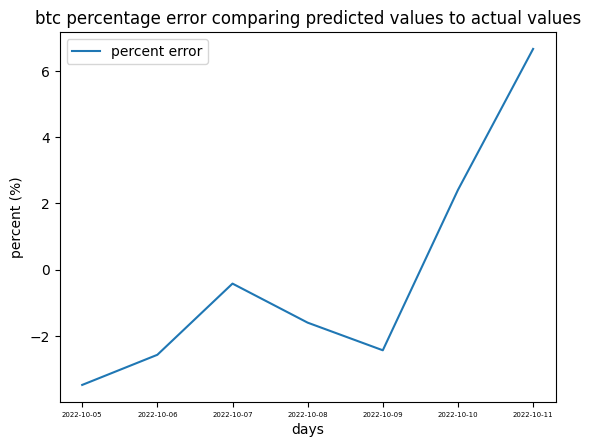

In [48]:
plt.plot(dates, percent_error_list, label = "percent error")
plt.legend()
plt.title(f"btc percentage error comparing predicted values to actual values")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('percent (%)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/btc/percent_error_line.png')
plt.show()

In [49]:
prediction_list = btc_predictions['predicted_price_close'].values

In [52]:
prediction_list

array([19461.55286701, 19439.16026156, 19450.40696026, 19110.11783247,
       18972.62223501, 19591.74851886, 20328.57547346])

array([19461.55286701, 19439.16026156, 19450.40696026, 19110.11783247,
       18972.62223501, 19591.74851886, 20328.57547346])

array([19461.55286701, 19439.16026156, 19450.40696026, 19110.11783247,
       18972.62223501, 19591.74851886, 20328.57547346])

In [53]:
actual_list = btc_predictions['actual_price_close'].values


In [54]:
actual_list

array([20162., 19951., 19532., 19420., 19445., 19131., 19059.])

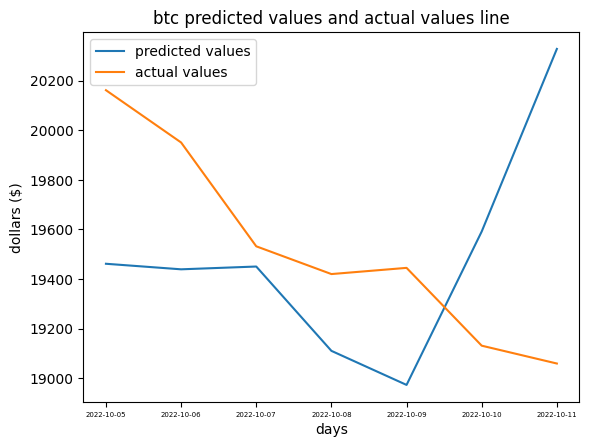

In [56]:

plt.plot(dates, prediction_list, label = "predicted values")
plt.plot(dates, actual_list, label = "actual values")

plt.legend()
plt.title(f"btc predicted values and actual values line")
plt.xticks(fontsize=5)
plt.xlabel('days')
plt.ylabel('dollars ($)')
plt.savefig(f'C:/Users/Hamza/PycharmProjects/dissertation_project/data/stage_3/btc/predicted_vs_actual.png')
plt.show()
